In [429]:
# Dependencies and set up
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets


In [430]:
# Read the data of sales price of housing

sales_data = pd.read_csv("project1_saledata.csv")

sales_data.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022
0,102001,0,United States,country,NaN,180000.0,185000.0,185000.0,187110.0,193000.0,...,330000.0,345000.0,360000.0,365000.0,365000.0,355000.0,349000.0,341307.0,335000.0,329000
1,394913,1,"New York, NY",msa,NY,404920.0,399000.0,399451.0,400000.0,405000.0,...,516500.0,525000.0,540000.0,546500.0,570000.0,585000.0,580000.0,560000.0,540000.0,534450
2,753899,2,"Los Angeles, CA",msa,CA,505000.0,495000.0,500000.0,490000.0,482000.0,...,865000.0,900000.0,935000.0,934000.0,915000.0,890000.0,878000.0,865000.0,853250.0,850000
3,394463,3,"Chicago, IL",msa,IL,239000.0,237500.0,240000.0,240000.0,250000.0,...,270000.0,280000.0,300000.0,306000.0,315000.0,310000.0,300000.0,285000.0,279000.0,280000
4,394514,4,"Dallas, TX",msa,TX,137000.0,144500.0,143500.0,145874.0,154900.0,...,368000.0,387000.0,415000.0,425000.0,424167.0,410000.0,400000.0,388000.0,385000.0,375000


In [431]:
Seattle_df=sales_data[sales_data["RegionName"] == "Seattle, WA"]
Seattle_df


,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022
15,395078,15,"Seattle, WA",msa,WA,334990.0,330000.0,337000.0,336950.0,335000.0,...,653000.0,706000.0,740000.0,750000.0,720000.0,680000.0,665000.0,660000.0,669950.0,630000


In [432]:
Tampa_df=sales_data[sales_data["RegionName"] == "Tampa, FL"]
Tampa_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022
18,395148,18,"Tampa, FL",msa,FL,167346.0,170750.0,168000.0,173000.0,175000.0,...,335000.0,350000.0,357550.0,375000.0,386000.0,380000.0,370000.0,360000.0,368000.0,355000


In [433]:
San_Jose_df = sales_data[sales_data["RegionName"] == "San Jose, CA"]
San_Jose_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022
35,395059,35,"San Jose, CA",msa,CA,692500.0,705000.0,695000.0,700000.0,680000.0,...,1400000.0,1510000.0,1550000.0,1513500.0,1465000.0,1390000.0,1350000.0,1320000.0,1325000.0,1301000


In [434]:
Phoenix_df = sales_data[sales_data["RegionName"] == "Phoenix, AZ"]
Phoenix_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022
10,394976,10,"Phoenix, AZ",msa,AZ,227000.0,225000.0,227000.0,226000.0,225000.0,...,452000.0,469000.0,475100.0,491000.0,490000.0,470000.0,457499.0,449450.0,449000.0,430000


In [435]:

Austin_df = sales_data[sales_data["RegionName"] == "Austin, TX"]
Austin_df


,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022
29,394355,29,"Austin, TX",msa,TX,180500.0,185000.0,186000.0,189998.0,192000.0,...,505750.0,545000.0,565000.0,585250.0,560000.0,525000.0,512875.0,497500.0,483662.0,475000


In [436]:
combined_cities_1 = pd.concat([Seattle_df, Tampa_df,
                              San_Jose_df, Phoenix_df, 
                             Austin_df]) 
combined_cities_1.reset_index(inplace=True)

In [437]:
combined_cities_1.columns

Index(['index', 'RegionID', 'SizeRank', 'RegionName', 'RegionType',
       'StateName', '2/29/2008', '3/31/2008', '4/30/2008', '5/31/2008',
       ...
       '2/28/2022', '3/31/2022', '4/30/2022', '5/31/2022', '6/30/2022',
       '7/31/2022', '8/31/2022', '9/30/2022', '10/31/2022', '11/30/2022'],
      dtype='object', length=184)

In [438]:
update_combined_cities_1 = combined_cities_1.drop (columns = ["index","RegionID","SizeRank","RegionType","StateName"])
update_combined_cities_1.set_index("RegionName", inplace=True)
update_combined_cities_1

,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,...,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022
RegionName,,,,,,,,,,,,,,,,,,,,,
"Seattle, WA",334990.0,330000.0,337000.0,336950.0,335000.0,332500.0,329725.0,316500.0,319540.0,303485.0,...,653000.0,706000.0,740000.0,750000.0,720000.0,680000.0,665000.0,660000.0,669950.0,630000
"Tampa, FL",167346.0,170750.0,168000.0,173000.0,175000.0,173000.0,167100.0,165000.0,155000.0,150000.0,...,335000.0,350000.0,357550.0,375000.0,386000.0,380000.0,370000.0,360000.0,368000.0,355000
"San Jose, CA",692500.0,705000.0,695000.0,700000.0,680000.0,650000.0,615000.0,600000.0,560000.0,515000.0,...,1400000.0,1510000.0,1550000.0,1513500.0,1465000.0,1390000.0,1350000.0,1320000.0,1325000.0,1301000
"Phoenix, AZ",227000.0,225000.0,227000.0,226000.0,225000.0,214250.0,210000.0,200000.0,200000.0,190000.0,...,452000.0,469000.0,475100.0,491000.0,490000.0,470000.0,457499.0,449450.0,449000.0,430000
"Austin, TX",180500.0,185000.0,186000.0,189998.0,192000.0,190000.0,190000.0,179250.0,178000.0,179925.0,...,505750.0,545000.0,565000.0,585250.0,560000.0,525000.0,512875.0,497500.0,483662.0,475000


In [439]:
# read the data of rental rate of property

rent_data = pd.read_csv("City_zori_sm_month.csv")
del rent_data['Metro']
del rent_data['CountyName']
# Merge our two data frames together

rent_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,3/31/2015,4/30/2015,5/31/2015,6/30/2015,...,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022
0,6181,0,New York,city,NY,NY,2585.688900,2609.168132,2632.046477,2654.783113,...,3114.512403,3170.821868,3237.322640,3308.636280,3364.395121,3392.054826,3389.451192,3365.119483,3321.735835,3289.299455
1,12447,1,Los Angeles,city,CA,CA,1946.783507,1957.261756,1975.079103,1988.369156,...,2766.873699,2792.164063,2825.976086,2846.883247,2870.314405,2884.333128,2898.687647,2889.836887,2881.269091,2871.924144
2,39051,2,Houston,city,TX,TX,1299.402569,1307.461791,1318.354016,1328.504639,...,1567.258051,1577.558101,1590.417247,1603.603153,1615.335907,1622.003502,1620.885870,1616.041589,1608.451657,1603.444974
3,17426,3,Chicago,city,IL,IL,1512.626150,1528.316363,1542.472583,1573.811799,...,1847.535331,1871.471422,1900.270274,1921.383543,1939.979625,1945.315613,1944.132988,1939.464285,1932.195069,1933.372749
4,6915,4,San Antonio,city,TX,TX,1008.558187,1016.748530,1026.407644,1033.734039,...,1395.673891,1410.740817,1430.143729,1445.717822,1460.431930,1461.441079,1459.847602,1450.424529,1447.521690,1442.811014


In [440]:
Seattle_rent_df=rent_data[rent_data["RegionName"] == "Seattle"]
Seattle_rent_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,3/31/2015,4/30/2015,5/31/2015,6/30/2015,...,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022
21,16037,21,Seattle,city,WA,WA,1611.266981,1632.763973,1645.851651,1656.604908,...,2112.894872,2136.647089,2163.828595,2193.053069,2220.256709,2238.767819,2239.694399,2225.733041,2192.254572,2164.705445


In [441]:
Tampa_rent_df=rent_data[rent_data["RegionName"] == "Tampa"]
Tampa_rent_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,3/31/2015,4/30/2015,5/31/2015,6/30/2015,...,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022
47,41176,47,Tampa,city,FL,FL,1175.648257,1184.782521,1195.302908,1200.705597,...,2106.529317,2134.402621,2150.030735,2169.040956,2190.193685,2202.216977,2210.887343,2191.575532,2178.999311,2159.593714


In [442]:
SanJose_rent_df=rent_data[rent_data["RegionName"] == "San Jose"]
SanJose_rent_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,3/31/2015,4/30/2015,5/31/2015,6/30/2015,...,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022
11,33839,11,San Jose,city,CA,CA,2402.986432,2418.792388,2455.760971,2503.880066,...,2976.60871,3015.903509,3037.584029,3094.890816,3146.421126,3192.479766,3192.635057,3156.606217,3115.467159,3085.627114


In [443]:
Austin_rent_df=rent_data[rent_data["RegionName"] == "Austin"]
Austin_rent_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,3/31/2015,4/30/2015,5/31/2015,6/30/2015,...,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022
10,10221,10,Austin,city,TX,TX,1244.869481,1250.122111,1270.18623,1280.202644,...,1809.128538,1839.10736,1867.755986,1904.367527,1930.410878,1936.161005,1925.649776,1904.321425,1879.353053,1863.894169
2482,37227,6073,Austin,city,AR,AR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150.000000


In [444]:
Phoenix_rent_df=rent_data[rent_data["RegionName"] == "Phoenix"]
Phoenix_rent_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,3/31/2015,4/30/2015,5/31/2015,6/30/2015,...,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022
5,40326,5,Phoenix,city,AZ,AZ,926.484176,942.081186,946.802452,954.749036,...,1766.476869,1781.448685,1800.249302,1808.188261,1811.937251,1805.387546,1796.960133,1792.007828,1782.063796,1780.031957


In [445]:

sales_data = sales_data.rename(columns={"RegionName":"RegionName"})
sales_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022
0,102001,0,United States,country,NaN,180000.0,185000.0,185000.0,187110.0,193000.0,...,330000.0,345000.0,360000.0,365000.0,365000.0,355000.0,349000.0,341307.0,335000.0,329000
1,394913,1,"New York, NY",msa,NY,404920.0,399000.0,399451.0,400000.0,405000.0,...,516500.0,525000.0,540000.0,546500.0,570000.0,585000.0,580000.0,560000.0,540000.0,534450
2,753899,2,"Los Angeles, CA",msa,CA,505000.0,495000.0,500000.0,490000.0,482000.0,...,865000.0,900000.0,935000.0,934000.0,915000.0,890000.0,878000.0,865000.0,853250.0,850000
3,394463,3,"Chicago, IL",msa,IL,239000.0,237500.0,240000.0,240000.0,250000.0,...,270000.0,280000.0,300000.0,306000.0,315000.0,310000.0,300000.0,285000.0,279000.0,280000
4,394514,4,"Dallas, TX",msa,TX,137000.0,144500.0,143500.0,145874.0,154900.0,...,368000.0,387000.0,415000.0,425000.0,424167.0,410000.0,400000.0,388000.0,385000.0,375000


In [446]:

rent_data = rent_data.rename(columns={"RegionName":"RegionName"})
rent_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,3/31/2015,4/30/2015,5/31/2015,6/30/2015,...,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022
0,6181,0,New York,city,NY,NY,2585.688900,2609.168132,2632.046477,2654.783113,...,3114.512403,3170.821868,3237.322640,3308.636280,3364.395121,3392.054826,3389.451192,3365.119483,3321.735835,3289.299455
1,12447,1,Los Angeles,city,CA,CA,1946.783507,1957.261756,1975.079103,1988.369156,...,2766.873699,2792.164063,2825.976086,2846.883247,2870.314405,2884.333128,2898.687647,2889.836887,2881.269091,2871.924144
2,39051,2,Houston,city,TX,TX,1299.402569,1307.461791,1318.354016,1328.504639,...,1567.258051,1577.558101,1590.417247,1603.603153,1615.335907,1622.003502,1620.885870,1616.041589,1608.451657,1603.444974
3,17426,3,Chicago,city,IL,IL,1512.626150,1528.316363,1542.472583,1573.811799,...,1847.535331,1871.471422,1900.270274,1921.383543,1939.979625,1945.315613,1944.132988,1939.464285,1932.195069,1933.372749
4,6915,4,San Antonio,city,TX,TX,1008.558187,1016.748530,1026.407644,1033.734039,...,1395.673891,1410.740817,1430.143729,1445.717822,1460.431930,1461.441079,1459.847602,1450.424529,1447.521690,1442.811014


In [447]:
combined_cities_1 = pd.concat([Seattle_df, Tampa_df,
                              San_Jose_df, Phoenix_df, 
                             Austin_df]) 
combined_cities_1.reset_index(inplace=True)
combined_cities_1.columns

Index(['index', 'RegionID', 'SizeRank', 'RegionName', 'RegionType',
       'StateName', '2/29/2008', '3/31/2008', '4/30/2008', '5/31/2008',
       ...
       '2/28/2022', '3/31/2022', '4/30/2022', '5/31/2022', '6/30/2022',
       '7/31/2022', '8/31/2022', '9/30/2022', '10/31/2022', '11/30/2022'],
      dtype='object', length=184)

In [448]:
combined_rent_1 = pd.concat([Seattle_rent_df, Tampa_rent_df,
                              SanJose_rent_df, Phoenix_rent_df, 
                             Austin_rent_df]) 
combined_rent_1.reset_index(inplace=True)
combined_rent_1.columns

Index(['index', 'RegionID', 'SizeRank', 'RegionName', 'RegionType',
       'StateName', 'State', '3/31/2015', '4/30/2015', '5/31/2015',
       ...
       '3/31/2022', '4/30/2022', '5/31/2022', '6/30/2022', '7/31/2022',
       '8/31/2022', '9/30/2022', '10/31/2022', '11/30/2022', '12/31/2022'],
      dtype='object', length=101)

In [449]:


update_combined_cities_1 = combined_cities_1.drop (columns = ["index","RegionID","SizeRank","RegionType","StateName"])
update_combined_cities_1.set_index("RegionName", inplace=True)
update_combined_cities_1

,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,...,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022
RegionName,,,,,,,,,,,,,,,,,,,,,
"Seattle, WA",334990.0,330000.0,337000.0,336950.0,335000.0,332500.0,329725.0,316500.0,319540.0,303485.0,...,653000.0,706000.0,740000.0,750000.0,720000.0,680000.0,665000.0,660000.0,669950.0,630000
"Tampa, FL",167346.0,170750.0,168000.0,173000.0,175000.0,173000.0,167100.0,165000.0,155000.0,150000.0,...,335000.0,350000.0,357550.0,375000.0,386000.0,380000.0,370000.0,360000.0,368000.0,355000
"San Jose, CA",692500.0,705000.0,695000.0,700000.0,680000.0,650000.0,615000.0,600000.0,560000.0,515000.0,...,1400000.0,1510000.0,1550000.0,1513500.0,1465000.0,1390000.0,1350000.0,1320000.0,1325000.0,1301000
"Phoenix, AZ",227000.0,225000.0,227000.0,226000.0,225000.0,214250.0,210000.0,200000.0,200000.0,190000.0,...,452000.0,469000.0,475100.0,491000.0,490000.0,470000.0,457499.0,449450.0,449000.0,430000
"Austin, TX",180500.0,185000.0,186000.0,189998.0,192000.0,190000.0,190000.0,179250.0,178000.0,179925.0,...,505750.0,545000.0,565000.0,585250.0,560000.0,525000.0,512875.0,497500.0,483662.0,475000


In [450]:

update_combined_rent_1 = combined_rent_1.drop (columns = ["index","RegionID","SizeRank","RegionType","StateName", "State"])
update_combined_rent_1.set_index("RegionName", inplace=True)
update_combined_rent_1

,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,...,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022
RegionName,,,,,,,,,,,,,,,,,,,,,
Seattle,1611.266981,1632.763973,1645.851651,1656.604908,1671.632049,1687.791915,1698.024570,1699.086180,1698.221765,1693.241736,...,2112.894872,2136.647089,2163.828595,2193.053069,2220.256709,2238.767819,2239.694399,2225.733041,2192.254572,2164.705445
Tampa,1175.648257,1184.782521,1195.302908,1200.705597,1210.337683,1217.580555,1221.662547,1224.780682,1229.731273,1237.189854,...,2106.529317,2134.402621,2150.030735,2169.040956,2190.193685,2202.216977,2210.887343,2191.575532,2178.999311,2159.593714
San Jose,2402.986432,2418.792388,2455.760971,2503.880066,2554.396057,2582.826680,2587.402453,2598.179972,2588.089333,2581.421043,...,2976.608710,3015.903509,3037.584029,3094.890816,3146.421126,3192.479766,3192.635057,3156.606217,3115.467159,3085.627114
Phoenix,926.484176,942.081186,946.802452,954.749036,954.721450,958.193868,963.030470,964.286113,967.210053,966.905188,...,1766.476869,1781.448685,1800.249302,1808.188261,1811.937251,1805.387546,1796.960133,1792.007828,1782.063796,1780.031957
Austin,1244.869481,1250.122111,1270.186230,1280.202644,1291.864421,1292.170073,1289.278157,1281.209069,1280.067581,1286.583797,...,1809.128538,1839.107360,1867.755986,1904.367527,1930.410878,1936.161005,1925.649776,1904.321425,1879.353053,1863.894169
Austin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150.000000


In [451]:
combined_cities_list = []

for year in range(2015, 2023):
    possible_short_names = [f'{year}-{month:02d}'
                            for month in range(1, 13)]

    year_columns = [full_name
                    for full_name in update_combined_cities_1.columns
                    if full_name[:7] in possible_short_names]

    year_columns = ['RegionName'] + year_columns
    combined_cities_list.append(combined_cities_1[year_columns])
    
combined_cities_list[0]

,RegionName
0,"Seattle, WA"
1,"Tampa, FL"
2,"San Jose, CA"
3,"Phoenix, AZ"
4,"Austin, TX"


In [482]:



combined_cities_list = []

for year in range(2015, 2023):
    possible_short_names = [f'{year}-{month:02d}'
                            for month in range(1, 13)]

    year_columns = [full_name
                    for full_name in update_combined_cities_1.columns
                    if full_name[:7] in possible_short_names]

    year_columns = ['RegionName'] + year_columns
    combined_cities_list.append(combined_cities_1[year_columns])
    
combined_cities_list[0]

combined_cities_2 = update_combined_cities_1.transpose()
combined_cities_2.head(10)
transposed_cities = combined_cities_2.drop(index=combined_cities_2.index[:-95])
transposed_cities


RegionName,"Seattle, WA","Tampa, FL","San Jose, CA","Phoenix, AZ","Austin, TX"
1/31/2015,311860.0,145000.0,667500.0,199000.0,237000.0
2/28/2015,311000.0,149200.0,713250.0,200000.0,238000.0
3/31/2015,330000.0,155000.0,773500.0,205000.0,246000.0
4/30/2015,340000.0,158000.0,789000.0,206000.0,259000.0
5/31/2015,349719.0,165000.0,825000.0,215000.0,267650.0
...,...,...,...,...,...
7/31/2022,680000.0,380000.0,1390000.0,470000.0,525000.0
8/31/2022,665000.0,370000.0,1350000.0,457499.0,512875.0
9/30/2022,660000.0,360000.0,1320000.0,449450.0,497500.0
10/31/2022,669950.0,368000.0,1325000.0,449000.0,483662.0


In [483]:
update_transposed_cities =transposed_cities.drop(labels=["1/31/2015", "2/28/2015"], axis=0)
sanjose_sale_1 = update_transposed_cities.drop (columns = [ "San Jose, CA", "Austin, TX", "Tampa, FL", "Phoenix, AZ" ])
sanjose_sale_1

RegionName,"Seattle, WA"
3/31/2015,330000.0
4/30/2015,340000.0
5/31/2015,349719.0
6/30/2015,359990.0
7/31/2015,345000.0
...,...
7/31/2022,680000.0
8/31/2022,665000.0
9/30/2022,660000.0
10/31/2022,669950.0


In [454]:
combined_rent_list = []

for year in range(2015, 2023):
    possible_short_names = [f'{year}-{month:02d}'
                            for month in range(1, 13)]

    year_columns = [full_name
                    for full_name in update_combined_rent_1.columns
                    if full_name[:7] in possible_short_names]

    year_columns = ['RegionName'] + year_columns
    combined_rent_list.append(combined_rent_1[year_columns])
    
combined_rent_list[0]

,RegionName
0,Seattle
1,Tampa
2,San Jose
3,Phoenix
4,Austin
5,Austin


In [455]:
combined_rent_list = []

for year in range(2015, 2023):
    possible_short_names = [f'{year}-{month:02d}'
                            for month in range(1, 13)]

    year_columns = [full_name
                    for full_name in update_combined_rent_1.columns
                    if full_name[:7] in possible_short_names]

    year_columns = ['RegionName'] + year_columns
    combined_rent_list.append(combined_rent_1[year_columns])
    
combined_rent_list[0]

combined_rent_2 = update_combined_rent_1.transpose()
combined_rent_2.head(10)
transposed_rent = combined_rent_2.drop(index=combined_rent_2.index[:-95])
transposed_rent

RegionName,Seattle,Tampa,San Jose,Phoenix,Austin,Austin
3/31/2015,1611.266981,1175.648257,2402.986432,926.484176,1244.869481,NaN
4/30/2015,1632.763973,1184.782521,2418.792388,942.081186,1250.122111,NaN
5/31/2015,1645.851651,1195.302908,2455.760971,946.802452,1270.186230,NaN
6/30/2015,1656.604908,1200.705597,2503.880066,954.749036,1280.202644,NaN
7/31/2015,1671.632049,1210.337683,2554.396057,954.721450,1291.864421,NaN
...,...,...,...,...,...,...
8/31/2022,2238.767819,2202.216977,3192.479766,1805.387546,1936.161005,NaN
9/30/2022,2239.694399,2210.887343,3192.635057,1796.960133,1925.649776,NaN
10/31/2022,2225.733041,2191.575532,3156.606217,1792.007828,1904.321425,NaN
11/30/2022,2192.254572,2178.999311,3115.467159,1782.063796,1879.353053,NaN


In [456]:
update_transposed_rent =transposed_rent.drop(labels=["12/31/2022"], axis=0)
sanjose_rent_1 = update_transposed_rent.drop (columns = ["San Jose", "Austin", "Tampa", "Phoenix" ])

sanjose_rent_1

RegionName,Seattle
3/31/2015,1611.266981
4/30/2015,1632.763973
5/31/2015,1645.851651
6/30/2015,1656.604908
7/31/2015,1671.632049
...,...
7/31/2022,2220.256709
8/31/2022,2238.767819
9/30/2022,2239.694399
10/31/2022,2225.733041


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


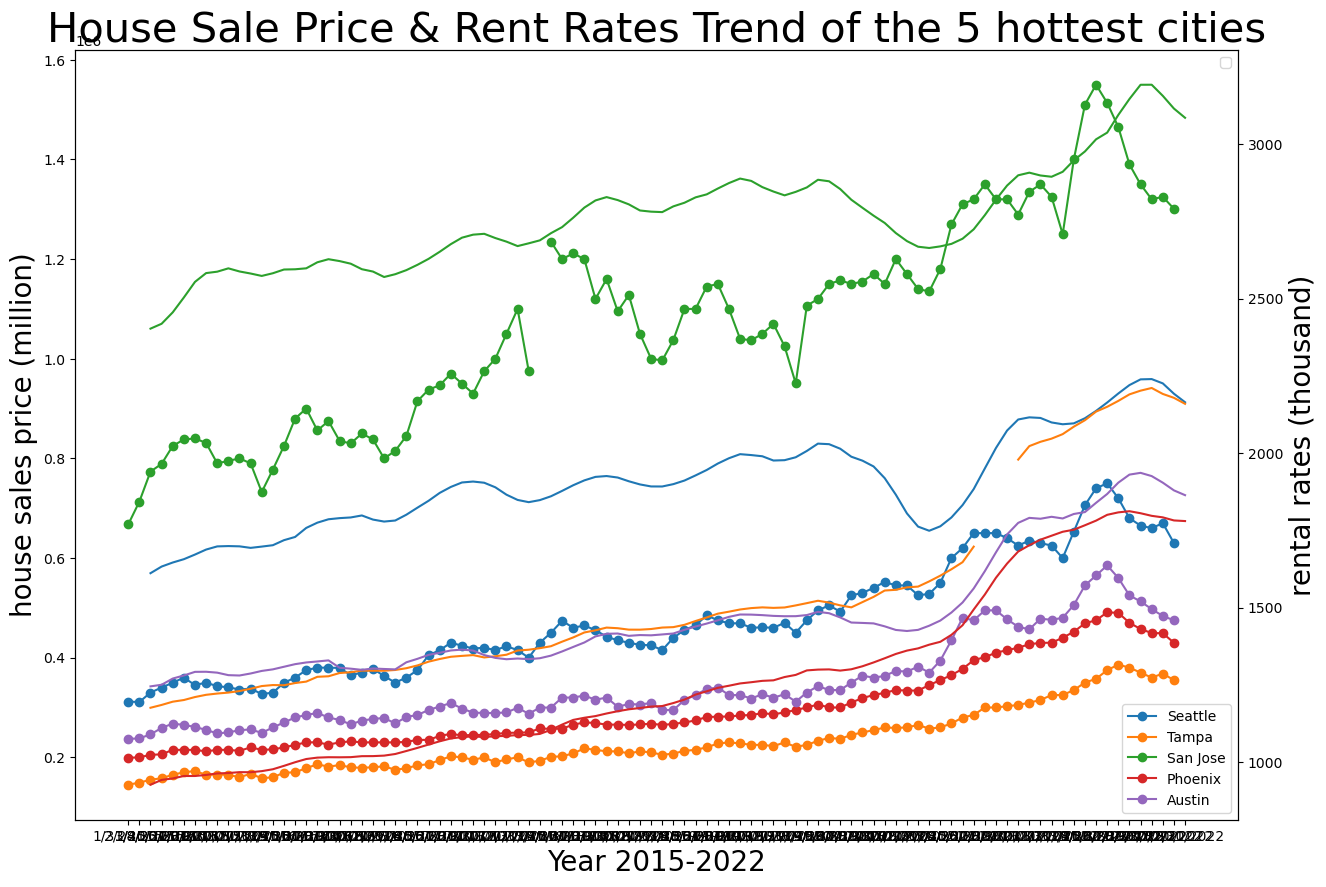

In [457]:

# Plot  as a line chart
# Create a legend for our chart
# Show the chart


fig, ax1 = plt.subplots(figsize=(15, 10))


ax2      = ax1.twinx()
ax1.plot(transposed_cities, marker= "o")

ax1.set_title("House Sale Price & Rent Rates Trend of the 5 hottest cities", fontsize=30)

ax1.set_xlabel("Year 2015-2022",fontsize=20 )
ax1.set_ylabel("house sales price (million)", fontsize=20)
ax1.legend(["Seattle", "Tampa", "San Jose", "Phoenix", "Austin" ], loc ="lower right")

ax2.plot(transposed_rent)
ax2.set_ylabel("rental rates (thousand)", fontsize=20)
ax2.legend()






In [458]:
x_values = sanjose_rent_1["Seattle"]
x_values



3/31/2015     1611.266981
4/30/2015     1632.763973
5/31/2015     1645.851651
6/30/2015     1656.604908
7/31/2015     1671.632049
                 ...     
7/31/2022     2220.256709
8/31/2022     2238.767819
9/30/2022     2239.694399
10/31/2022    2225.733041
11/30/2022    2192.254572
Name: Seattle, Length: 93, dtype: float64

In [459]:
y_values = sanjose_sale_1["Seattle, WA"]
y_values

3/31/2015     330000.0
4/30/2015     340000.0
5/31/2015     349719.0
6/30/2015     359990.0
7/31/2015     345000.0
                ...   
7/31/2022     680000.0
8/31/2022     665000.0
9/30/2022     660000.0
10/31/2022    669950.0
11/30/2022    630000.0
Name: Seattle, WA, Length: 93, dtype: float64

The r-squared is: 0.6702528782529232


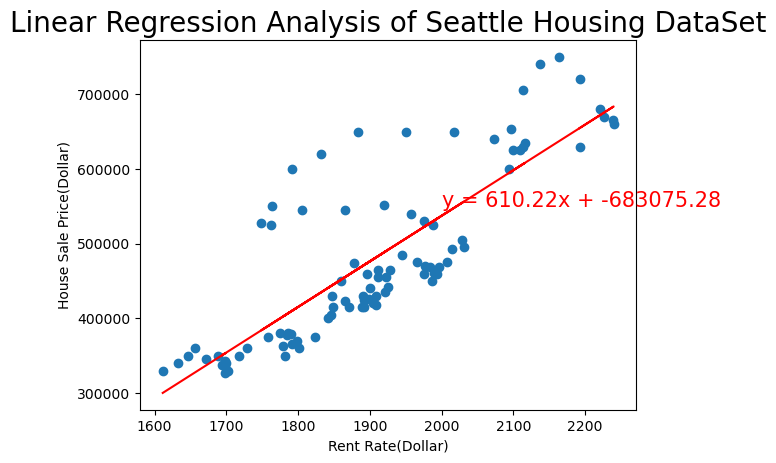

In [487]:
update_x_values= []
update_y_values= []
for i in range(0, 93): 
    update_x_values.append(x_values[i])
    update_y_values.append(y_values[i])

#scatter plot for the dataset
plt.scatter(update_x_values, update_y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(update_x_values, update_y_values)
# Add the linear regression equation and line to plot
regress_values= []
for j in range(0, 93): 
    newdata= update_x_values[j] * slope + intercept
    regress_values.append([newdata])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(update_x_values,regress_values,"r-")

print(f"The r-squared is: {rvalue**2}")
plt.annotate(line_eq,(2000,550000),fontsize=15,color="red")
plt.xlabel('Rent Rate(Dollar)')
plt.ylabel('House Sale Price(Dollar)')
plt.title("Linear Regression Analysis of Seattle Housing DataSet", fontsize=20)
plt.show()